In [95]:
from openni import openni2
from openni import _openni2 as c_api
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Various setup variables

In [96]:
Depth_ResX = 512
Depth_ResY = 424
Depth_fps = 30
RGB_ResX = 1920
RGB_ResY = 1080
RGB_fps = 30

Initialize OpenNNI

In [97]:
openni2.initialize("/usr/lib")

Open a device, and get some info from it.

In [98]:
dev = openni2.Device.open_any()
print(dev.get_device_info())

OniDeviceInfo(uri = b'freenect2://0?serial=124535140947', vendor = b'Microsoft', name = b'Kinect', usbVendorId = 30000, usbProductId = 48083)


Create a depth stream

In [99]:
#dev.set_image_registration_mode(True)
#dev.get_image_registration_mode()
#dev.depth_color_sync = True
#dev.get_image_registration_mode()
dev.set_depth_color_sync_enabled(True)

In [100]:
depth_stream = dev.create_depth_stream()
depth_stream.set_video_mode(c_api.OniVideoMode(pixelFormat=c_api.OniPixelFormat.ONI_PIXEL_FORMAT_DEPTH_1_MM,
                                               resolutionX=Depth_ResX,
                                               resolutionY=Depth_ResY,
                                               fps=Depth_fps,
                                              ))
depth_sensor_info = depth_stream.get_sensor_info()

Get depth stream video modes

In [101]:
for itm in depth_sensor_info.videoModes:
    print(itm)
max_depth = depth_stream.get_max_pixel_value()
#min_depth = depth_stream.get_min_pixel_value()
min_depth = 0
print("Min depth value: {}".format(min_depth))
print("Max depth value: {}".format(max_depth))

OniVideoMode(pixelFormat = OniPixelFormat.ONI_PIXEL_FORMAT_DEPTH_1_MM, resolutionX = 512, resolutionY = 424, fps = 30)
OniVideoMode(pixelFormat = OniPixelFormat.ONI_PIXEL_FORMAT_DEPTH_1_MM, resolutionX = 640, resolutionY = 480, fps = 30)
Min depth value: 0
Max depth value: 10000


Create color stream

In [102]:
rgb_stream = dev.create_color_stream()
rgb_sensor_info = rgb_stream.get_sensor_info()
for itm in rgb_sensor_info.videoModes:
    print(itm)

rgb_stream.set_video_mode(c_api.OniVideoMode(pixelFormat=c_api.OniPixelFormat.ONI_PIXEL_FORMAT_RGB888,
                                             resolutionX=RGB_ResX,
                                             resolutionY=RGB_ResY,
                                             fps=RGB_fps,
                                            ))

OniVideoMode(pixelFormat = OniPixelFormat.ONI_PIXEL_FORMAT_RGB888, resolutionX = 512, resolutionY = 424, fps = 30)
OniVideoMode(pixelFormat = OniPixelFormat.ONI_PIXEL_FORMAT_RGB888, resolutionX = 1920, resolutionY = 1080, fps = 30)


Start both streams, and get a buffer with data

In [103]:
depth_stream.start()
rgb_stream.start()

depth_frame = depth_stream.read_frame()
depth_data = depth_frame.get_buffer_as_uint16()
rgb_frame = rgb_stream.read_frame()
rgb_data = rgb_frame.get_buffer_as_triplet()

depth_stream.stop()
rgb_stream.stop()

In [104]:
depth_array = np.frombuffer(depth_data, dtype=np.uint16)
print(depth_array.shape)
depth_image = depth_array.reshape(Depth_ResY, Depth_ResX)
print(depth_image.shape)

(217088,)
(424, 512)


In [105]:
depth_image[depth_image==0x0000] = 0 #max_depth
depth_image[depth_image==0x7ff8] = 0
depth_image[depth_image==0xfff8] = 0
max_depth = np.max(depth_image)
depth_image = (depth_image - min_depth) / (max_depth - min_depth)
print(np.min(depth_image))
print(np.max(depth_image))

0.0
1.0


In [106]:
import pandas as pd
df = pd.DataFrame(depth_image.reshape(-1, ))
df.describe()

,0
count,217088.000000
mean,0.211350
std,0.304809
min,0.000000
25%,0.000000
50%,0.000000
75%,0.409202
max,1.000000


In [107]:
color_array = np.frombuffer(rgb_data, dtype=np.uint8)
print(color_array.shape)
color_image = color_array.reshape(RGB_ResY, RGB_ResX, -1)
#color_image = color_array.reshape(Depth_ResY, Depth_ResX, -1)
print(color_image.shape)

(6220800,)
(1080, 1920, 3)


In [108]:
#color_image[depth_image==0] = (0, 0, 0)

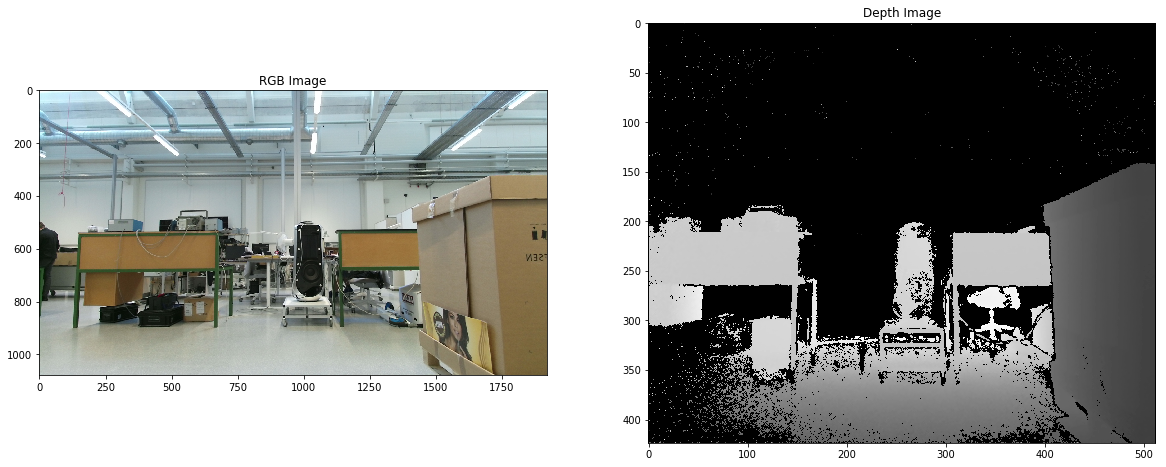

In [109]:
fig, subs = plt.subplots(1, 2, figsize=(20, 8))
subs[0].set_title("RGB Image")
subs[0].imshow(color_image)
subs[1].set_title("Depth Image")
subs[1].imshow(depth_image, cmap='gray')

https://www.codefull.org/2016/03/align-depth-and-color-frames-depth-and-rgb-registration/ <br>
https://msdn.microsoft.com/en-us/library/microsoft.kinect.nuikinectfusionvolume.nui_fusion_camera_parameters.aspx <br>
https://www.researchgate.net/post/can_we_rely_on_kinect_v2_to_get_world_coordinates_x_y_and_z_without_calibration

In [110]:
depth_Fxd = depth_stream.get_horizontal_fov()
depth_Fyd = depth_stream.get_vertical_fov()
rgb_Fxd = rgb_stream.get_horizontal_fov()
rgb_Fyd = rgb_stream.get_vertical_fov()

print("Depth Fxd: {}, Fyd: {}".format(depth_Fxd, depth_Fyd))
print("RGB Fxd: {}, Fyd: {}".format(rgb_Fxd, rgb_Fyd))

Depth Fxd: 1.0210176706314087, Fyd: 0.7958701252937317
RGB Fxd: 1.0821040868759155, Fyd: 0.8482300043106079


In [111]:
s = depth_stream.get_sensor_info()
depth_stream.

SyntaxError: invalid syntax (<ipython-input-111-ca1830670f67>, line 2)